In [1]:
import pandas as pd
import csv

dictionary = pd.read_csv("Loughran-McDonald_MasterDictionary_1993-2021.csv")  #Loading the dictionary

dictionary["Word"] = dictionary["Word"].str.lower()


##Contains all the words from dictionary
dictionary_words = []
for word in dictionary["Word"].values.tolist():
    dictionary_words.append(word)

##Contains all the words from the dictionary which are Positive
positive_words = []
for row_num_p, dict_data_p in dictionary.iterrows():
    if(dict_data_p["Positive"]>0):
        positive_words.append(dict_data_p["Word"].lower())
        
##Contains all the words from the dictionary which are Negative
negative_words = []
for row_num_n, dict_data_n in dictionary.iterrows():
    if(dict_data_n["Negative"]>0):
        negative_words.append(dict_data_n["Word"].lower())




In [3]:
import pandas as pd
import csv
import os

directory = '8K_filing'

cf = pd.read_csv("csv_file.csv")


def positive_score(text):
    """
    Calculates the no. of Positive words in the text which are in the positive_words list
    """
    numPosWords = 0
    split_text = text.split()
    for word in split_text:
        if word in positive_words:
            numPosWords  += 1
    
    sumPos = numPosWords
    return sumPos

def negative_score(text):
    """
    Calculates the no. of Negative words in the text which are in the positive_words list
    """
    numNegWords=0
    split_text = text.split()
    for word in split_text:
        if word in negative_words:
            numNegWords -=1
    sumNeg = numNegWords 
    sumNeg = sumNeg * -1
    return sumNeg
    

sentiment_list = [] 

##Iterates through each row of the Dataframe
for num, data in cf.iterrows():
    file_name = data["Name_of_text_file"]
    file_dic = os.path.join(directory, file_name)
    file = open(file_dic, "r")
    text = file.read()
    
    neg_count = negative_score(text)
    pos_count = positive_score(text)
    total_words = 0
    
    new_text = text.split()
    sentiment = 0
    
    ##Calculates the total no. of words in the text which are in the dictionary
    for word in new_text:
        if word in dictionary_words:
            total_words +=1
            
    if total_words != 0:
        sentiment = (pos_count-neg_count)/total_words
    sentiment_list.append(sentiment)

cf["Sentiment_Score"] = sentiment_list
print(cf["Sentiment_Score"])    ##Final Sentiment score of each text file

cf.to_csv("final.csv")      ## final.csv contains the CIK no., Date of filing, Name of the text file and Sentiment Score

0       0.019737
1      -0.027704
2       0.000000
3       0.006114
4       0.006024
          ...   
1075   -0.003472
1076    0.000000
1077   -0.006925
1078   -0.013841
1079    0.000000
Name: Sentiment_Score, Length: 1080, dtype: float64


## **Descriptive Statistics**

In [4]:
## Descriptive statistics 
cf["Sentiment_Score"].describe()

count    1080.000000
mean       -0.004191
std         0.016277
min        -0.198276
25%        -0.007874
50%         0.000000
75%         0.005181
max         0.068063
Name: Sentiment_Score, dtype: float64

## Average Sentiment Score over time

In [5]:
average_sentiment = []
avg_year =[]
start_year =1995
senti_scr = 0
for num, data in cf.iterrows():

    senti_scr += data["Sentiment_Score"]
    if(num%40==39):                                ##40 is used because each quarter contains 10 files so each contains 40 files
        average_sentiment.append(senti_scr/40)     ##Average sentiment score over each year 
        senti_scr=0
        avg_year.append(start_year)
        start_year += 1




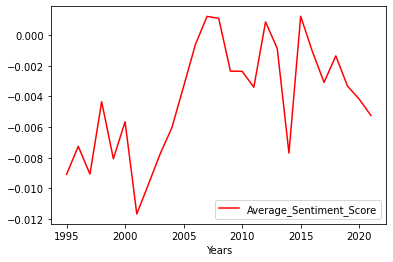

In [7]:
from matplotlib import pyplot as plt

plot_data = {"Years": avg_year,
        "Average_Sentiment_Score": average_sentiment}
plot_dataframe = pd.DataFrame(plot_data)
plot_dataframe.plot(kind="line",
                   x="Years",
                   y="Average_Sentiment_Score",
                   color="red")
plt.show()